Prior to running this, make sure to save the models and give the path to the respective model as :

```
model =  BlipForConditionalGeneration.from_pretrained("give your path here").to(device)
```





In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
root_dir = "/content/gdrive/"

Mounted at /content/gdrive/


In [13]:
!unzip /content/cake_samples.zip

Archive:  /content/cake_samples.zip
  inflating: cake_samples/000000000933.jpg  
  inflating: cake_samples/000000001956.jpg  
  inflating: cake_samples/000000003407.jpg  
  inflating: cake_samples/000000006772.jpg  
  inflating: cake_samples/000000009191.jpg  
  inflating: cake_samples/100000576067.jpg  


In [11]:
cake_sample_folder = '/content/cake_samples'

In [5]:
import torch
import os
from PIL import Image
from transformers import AutoProcessor, BlipForConditionalGeneration

In [15]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
#Run either this cell or the following cell as required
#MODEL TRAINED ON AUGMENTED DATASET.
model =  BlipForConditionalGeneration.from_pretrained("/content/gdrive/MyDrive/BLIP/5kdata").to(device) #Give the saved model location here

OSError: Incorrect path_or_model_id: '/content/gdrive/MyDrive/BLIP/5kdata'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [20]:
#MODEL TRAINED ON 2.9k dataset
model = BlipForConditionalGeneration.from_pretrained("/content/gdrive/MyDrive/Cake_Captioning/cake_caption_model2.9k").to(device) #Give the saved model location here

## CAPTION GENERATION WITH MODEL TRAINED ON 2.9k

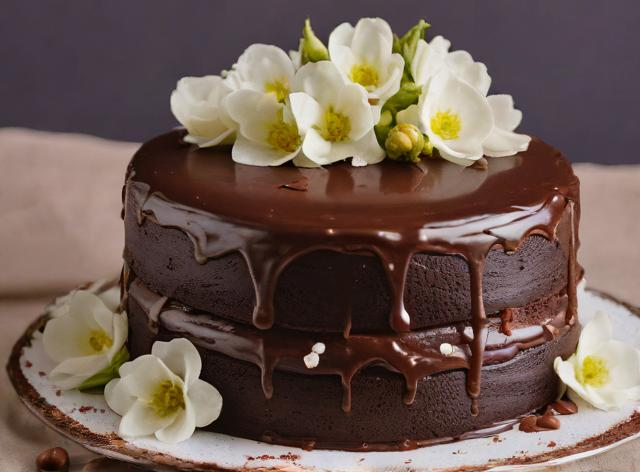

a chocolate cake with white flowers on it.


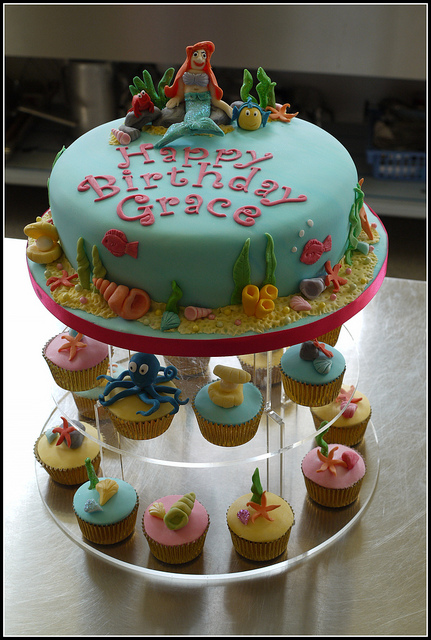

a cake with many cup cakes on it.


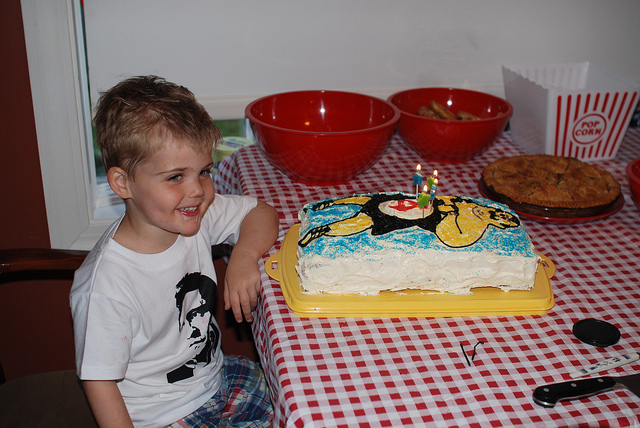

a young boy looking at a cake with lit candles.


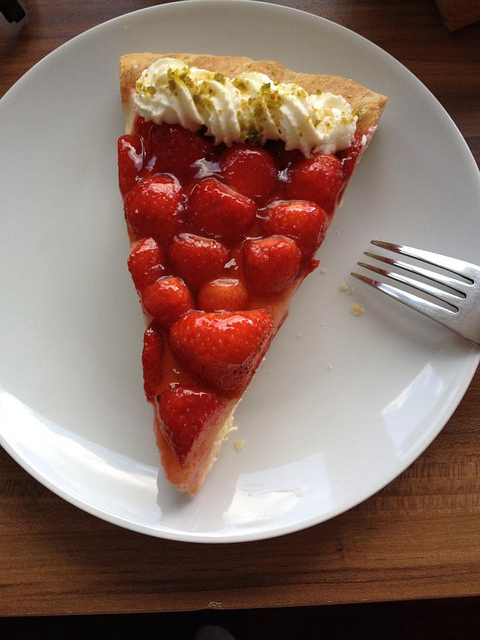

a piece of cake sitting on top of a white plate.


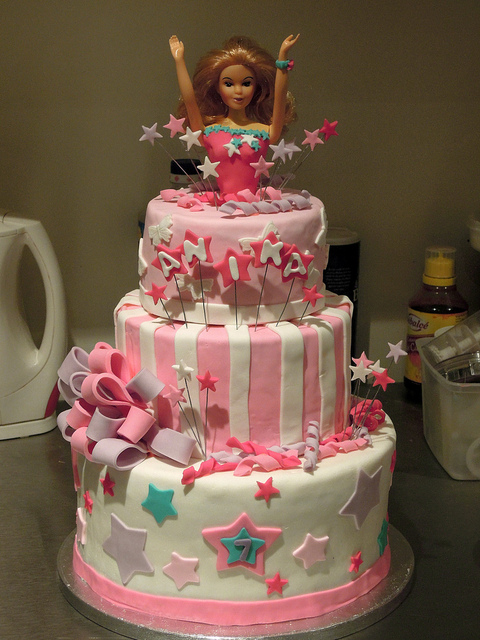

a cake with a teddy bear sitting on the top of it.


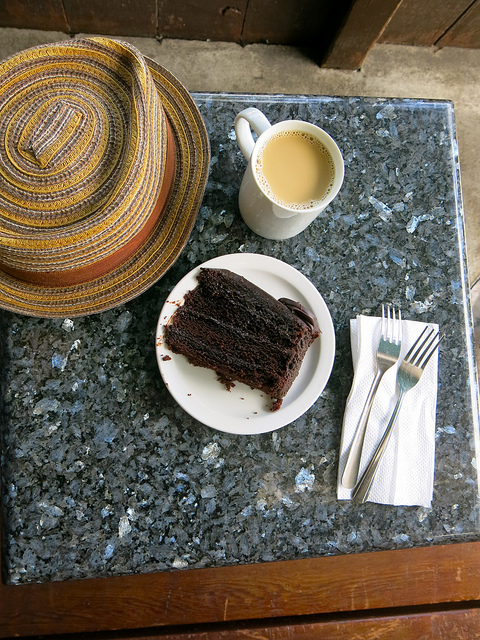

a table topped with a cake and a bowl filled with coffee.


In [21]:

for filename in os.listdir(cake_sample_folder):

  image_path = os.path.join(cake_sample_folder, filename)
  sample = Image.open(image_path)
  display(sample)

  inputs = processor(images=sample, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values

  generated_ids = model.generate(pixel_values=pixel_values, max_length=50).to(device)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  print(generated_caption)


## CAPTION GENERATION WITH MODEL TRAINED ON 5.8k

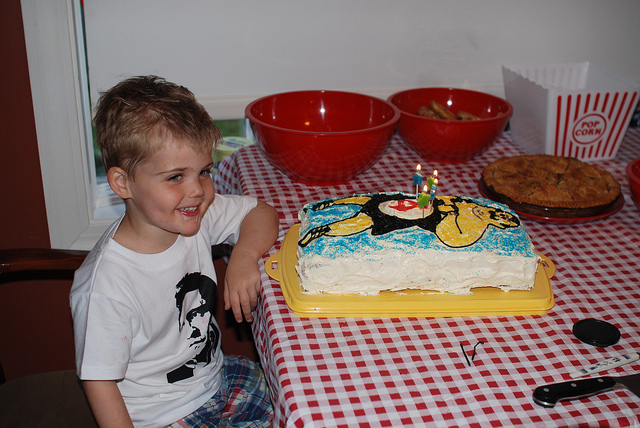

a woman cutting a cake with a knife.


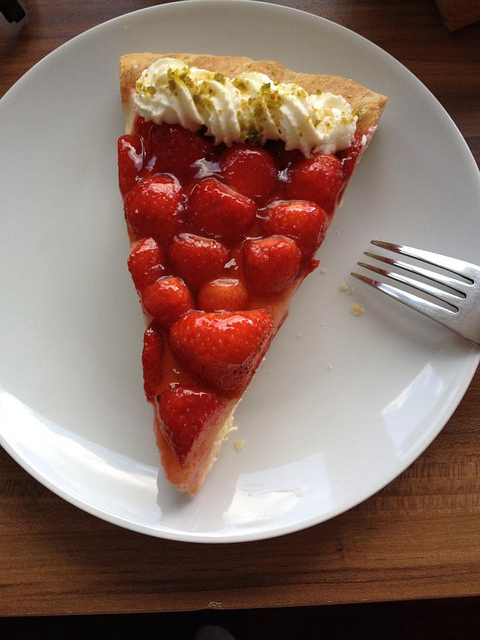

a plate of food has strawberries and chocolate powder.


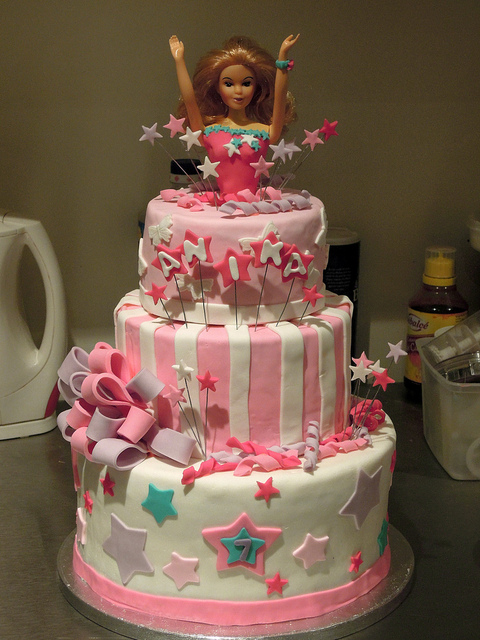

a large multi tier cake sitting on top of a table.


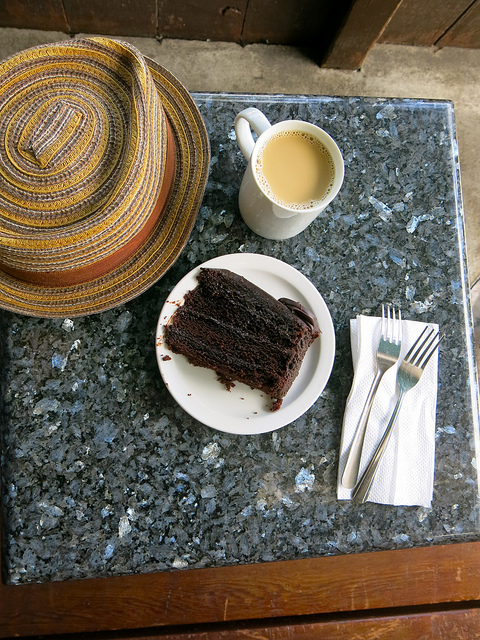

a plate of food and a cup on a table.


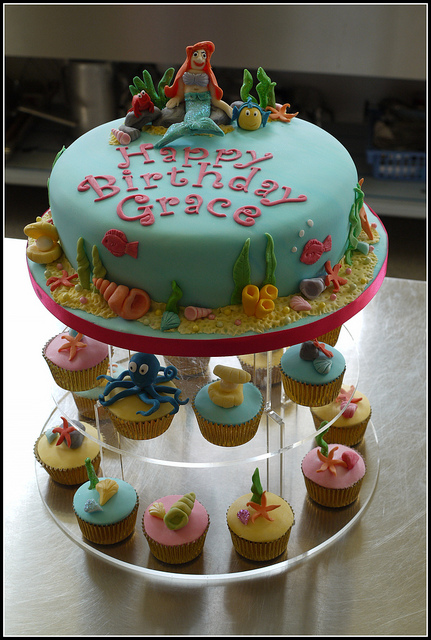

a cake with a lot of cupcakes on it.


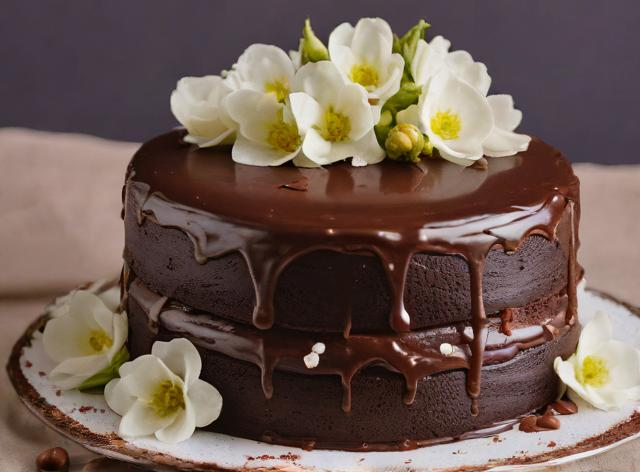

a cake sitting on top of a wooden tray.


In [ ]:
for filename in os.listdir(cake_sample_folder):

  image_path = os.path.join(cake_sample_folder, filename)
  sample = Image.open(image_path)
  display(sample)

  inputs = processor(images=sample, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values

  generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  print(generated_caption)